In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import time
sns.set_theme()
import random
random.seed(42)
np.random.seed(42)
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [2]:
df = pd.read_csv('2019EE10577.csv',header=None)

In [3]:
NUM_FEATURES = 784

In [4]:
def getData():
    X,y = [],[]
    for i,row in df.iterrows():
        X.append(row[:NUM_FEATURES])
        y.append(int(row[NUM_FEATURES]))
    return X,y

In [5]:
Xorig,Yorig = getData()

In [6]:
t_onehot = np.zeros((len(Yorig),10))
t_onehot[np.arange(len(t_onehot)),Yorig] = 1
torig = t_onehot

In [7]:
trainX = np.array(Xorig[:2700])
traint = np.array(torig[:2700])
testX = np.array(Xorig[2700:])
testt = np.array(torig[2700:])

In [14]:
model = Sequential()
model.add(Dense(units=100,activation='relu',input_shape=(784,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [15]:
opt = optimizers.SGD(lr=0.004)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 85,614
Trainable params: 85,614
Non-trainable params: 0
_________________________________________________________________


In [17]:
t1 = time.time()
history = model.fit(trainX,traint,batch_size=16,epochs=100,verbose=1,validation_data=(testX,testt))
t2 = time.time()

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 1s 424us/sample - loss: 2.2006 - accuracy: 0.2085 - val_loss: 2.0648 - val_accuracy: 0.3167
Epoch 2/100
2700/2700 [==============================] - 1s 204us/sample - loss: 1.9094 - accuracy: 0.4552 - val_loss: 1.7490 - val_accuracy: 0.5400
Epoch 3/100
2700/2700 [==============================] - 0s 152us/sample - loss: 1.5713 - accuracy: 0.6363 - val_loss: 1.3981 - val_accuracy: 0.7233
Epoch 4/100
2700/2700 [==============================] - 0s 118us/sample - loss: 1.2422 - accuracy: 0.7363 - val_loss: 1.1101 - val_accuracy: 0.7900
Epoch 5/100
2700/2700 [==============================] - 0s 121us/sample - loss: 0.9858 - accuracy: 0.7915 - val_loss: 0.8867 - val_accuracy: 0.8400
Epoch 6/100
2700/2700 [==============================] - 0s 118us/sample - loss: 0.8117 - accuracy: 0.8219 - val_loss: 0.7495 - val_accuracy: 0.8667
Epoch 7/100
2700/2700 [==============================] - 0s

2700/2700 [==============================] - 0s 122us/sample - loss: 0.1525 - accuracy: 0.9615 - val_loss: 0.3331 - val_accuracy: 0.9167
Epoch 56/100
2700/2700 [==============================] - 0s 121us/sample - loss: 0.1491 - accuracy: 0.9607 - val_loss: 0.3401 - val_accuracy: 0.9033
Epoch 57/100
2700/2700 [==============================] - 0s 113us/sample - loss: 0.1465 - accuracy: 0.9593 - val_loss: 0.3305 - val_accuracy: 0.9167
Epoch 58/100
2700/2700 [==============================] - 0s 112us/sample - loss: 0.1438 - accuracy: 0.9630 - val_loss: 0.3362 - val_accuracy: 0.9067
Epoch 59/100
2700/2700 [==============================] - 0s 114us/sample - loss: 0.1403 - accuracy: 0.9652 - val_loss: 0.3285 - val_accuracy: 0.9100
Epoch 60/100
2700/2700 [==============================] - 0s 117us/sample - loss: 0.1375 - accuracy: 0.9637 - val_loss: 0.3316 - val_accuracy: 0.9100
Epoch 61/100
2700/2700 [==============================] - 0s 119us/sample - loss: 0.1351 - accuracy: 0.9652 - val

In [18]:
t2-t1

33.250147342681885

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

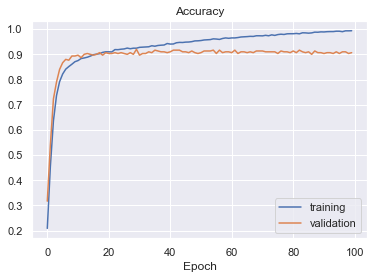

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

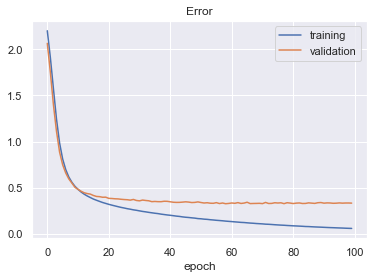

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()